# ML Project 1 : Credit card default

### ABOUT THE DATASET :

> The dataset is part of UCI Machine Learning Repository. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

 UNDERSTANDING THE FEATURES:   
 There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows 
- PAY_0: Repayment status in September, 2005 (-2=no consumption,0=revolving credit,-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months,    9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## PROBLEM STATEMENT :
> We have to predict if a customer is likely to default based on their personal information,business financial statement,customer transaction and repayment records.   
> This is a supervised learning problem under Classification (since target is labelled default = 1 or 0).   

> From the data we have to find the following :
> - **Identify the factors that determine credit card default**      
> - **Predict the likelihood of credit card default for customers of the given bank**  

## Importing and Understanding the Data:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [4]:
# reading data
df = pd.read_csv("credit_default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# dropping ID column:
df = df.drop(['ID'],axis=1)

In [6]:
# change name of Pay_0 to Pay_1:
df = df.rename(columns={'PAY_0':'PAY_sept','PAY_2':'PAY_aug','PAY_3':'PAY_jul','PAY_4':'PAY_jun','PAY_5':'PAY_may','PAY_6':'PAY_apr',
                        'BILL_AMT1':'BILL_AMT_sept','BILL_AMT2':'BILL_AMT_aug','BILL_AMT3':'BILL_AMT_jul','BILL_AMT4':'BILL_AMT_jun','BILL_AMT5':'BILL_AMT_may',
                        'BILL_AMT6':'BILL_AMT_apr','PAY_AMT1':'PAY_AMT_sept','PAY_AMT2':'PAY_AMT_aug','PAY_AMT3':'PAY_AMT_jul','PAY_AMT4':'PAY_AMT_jun',
                        'PAY_AMT5':'PAY_AMT_may','PAY_AMT6':'PAY_AMT_apr','default payment next month':'Default'})
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,...,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [7]:
# create copy of df :
df1 = df.copy()
df1.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,...,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [8]:
# get number of rows and columns
df1.shape

(30000, 24)

In [9]:
# check for missing values
df1.isnull().sum()

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_sept         0
PAY_aug          0
PAY_jul          0
PAY_jun          0
PAY_may          0
PAY_apr          0
BILL_AMT_sept    0
BILL_AMT_aug     0
BILL_AMT_jul     0
BILL_AMT_jun     0
BILL_AMT_may     0
BILL_AMT_apr     0
PAY_AMT_sept     0
PAY_AMT_aug      0
PAY_AMT_jul      0
PAY_AMT_jun      0
PAY_AMT_may      0
PAY_AMT_apr      0
Default          0
dtype: int64

> No Missing values in the dataset.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      30000 non-null  int64
 1   SEX            30000 non-null  int64
 2   EDUCATION      30000 non-null  int64
 3   MARRIAGE       30000 non-null  int64
 4   AGE            30000 non-null  int64
 5   PAY_sept       30000 non-null  int64
 6   PAY_aug        30000 non-null  int64
 7   PAY_jul        30000 non-null  int64
 8   PAY_jun        30000 non-null  int64
 9   PAY_may        30000 non-null  int64
 10  PAY_apr        30000 non-null  int64
 11  BILL_AMT_sept  30000 non-null  int64
 12  BILL_AMT_aug   30000 non-null  int64
 13  BILL_AMT_jul   30000 non-null  int64
 14  BILL_AMT_jun   30000 non-null  int64
 15  BILL_AMT_may   30000 non-null  int64
 16  BILL_AMT_apr   30000 non-null  int64
 17  PAY_AMT_sept   30000 non-null  int64
 18  PAY_AMT_aug    30000 non-null  int64
 19  PAY_

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_sept,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_may,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


> - There are 30000 distinct clients    
> - Credit card limit average is 1,67,484 (NT$) and minimumm limit is 10,000 and maximum limit is 10,00,000    
> - Education is mostly university (75% : 2)      
> - More than 50% are single         
> - Average age is 35.5yrs , age ranges from 21yrs - 79 yrs     
> - Default is 1 and non-default is 0, so mean = 0.22 (there are 22% of customers who will default next month)

In [12]:
# unique values of marriage feature
df1['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
# unique values of education feature
df1.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [14]:
# 0 in both marriage and education grouped to others and unknown repectively
# 6 being unknown put with 5 which is already grouped as unknown
df1.loc[:,'EDUCATION'] = df1.loc[:,'EDUCATION'].replace(0,5)
df1.loc[:,'EDUCATION'] = df1.loc[:,'EDUCATION'].replace(6,5)
df1.loc[:,'MARRIAGE'] = df1.loc[:,'MARRIAGE'].replace(0,3)

In [15]:
df1.EDUCATION.unique()

array([2, 1, 3, 5, 4], dtype=int64)

In [16]:
df1['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

## EXPLORATORY DATA ANALYSIS

#### 1. Distribution of Target Class

<AxesSubplot:title={'center':'Distribution of whether clients will default next month or not '}, xlabel='Default', ylabel='count'>

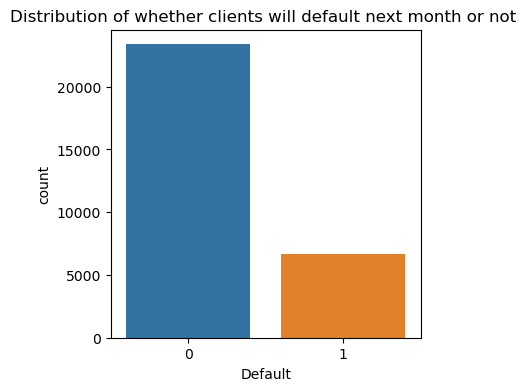

In [17]:
plt.figure(figsize=(4,4))
plt.title('Distribution of whether clients will default next month or not ')
sns.countplot(x='Default',data=df1)

In [18]:
df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

> Dataset is imbalanced and 22% customers will default next month (6636 customer out of 30,000)

#### 2. Finding correlation between features

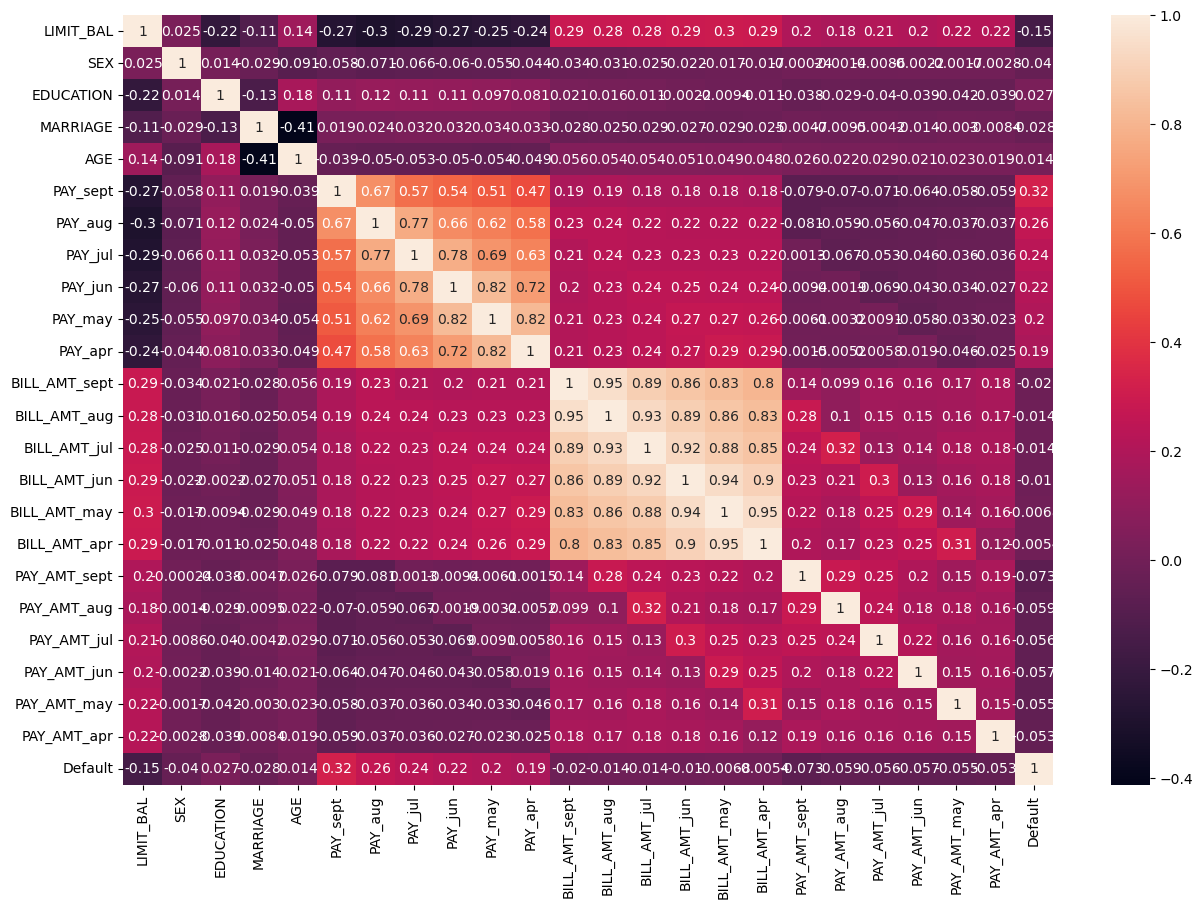

In [19]:
corr = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

> Age and Marriage are negatively correlated , but since marriage is a nominal feature we cant observe correlation between them

> None of the feature is highly correlated with what we are trying to predict (Default)   
> So the model performance will be based on combination of features rather than influenced by single feature

> Bill Statetments(BILL_AMTapr-BILL_AMTsept) and Repayment Status(PAY_apr-PAY_sept) for months April-Sept are highly correlated with each other   

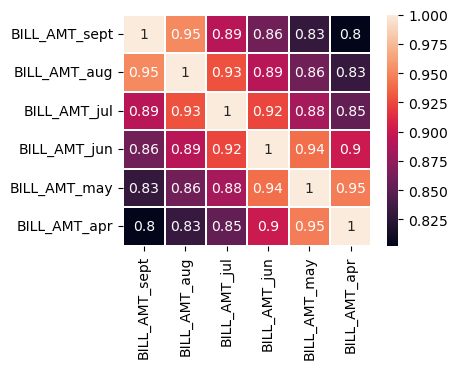

In [21]:
bill_amt = ['BILL_AMT_sept','BILL_AMT_aug','BILL_AMT_jul','BILL_AMT_jun','BILL_AMT_may','BILL_AMT_apr']

plt.figure(figsize=(4,3))
corr = df1[bill_amt].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,annot=True)
plt.show()

>  Bill Statement for months closer to each other are higher . Apr-Sept has lowest correlation

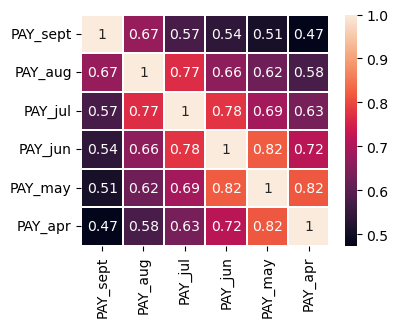

In [22]:
repay_amt = ['PAY_sept','PAY_aug','PAY_jul','PAY_jun','PAY_may','PAY_apr']

plt.figure(figsize=(4,3))
corr = df1[repay_amt].corr()
sns.heatmap(corr,linewidths=.1,annot=True)
plt.show()

> Payment status for months closer to each other are higher.    
> You can assume late payment in August can imply late payment in Sept. But it is less clear we can make the same assumption for April and September

#### UNIVARIATE ANALYSIS OF AGE

<AxesSubplot:title={'center':'Plot 6: Marriage along with Default'}, xlabel='MARRIAGE', ylabel='count'>

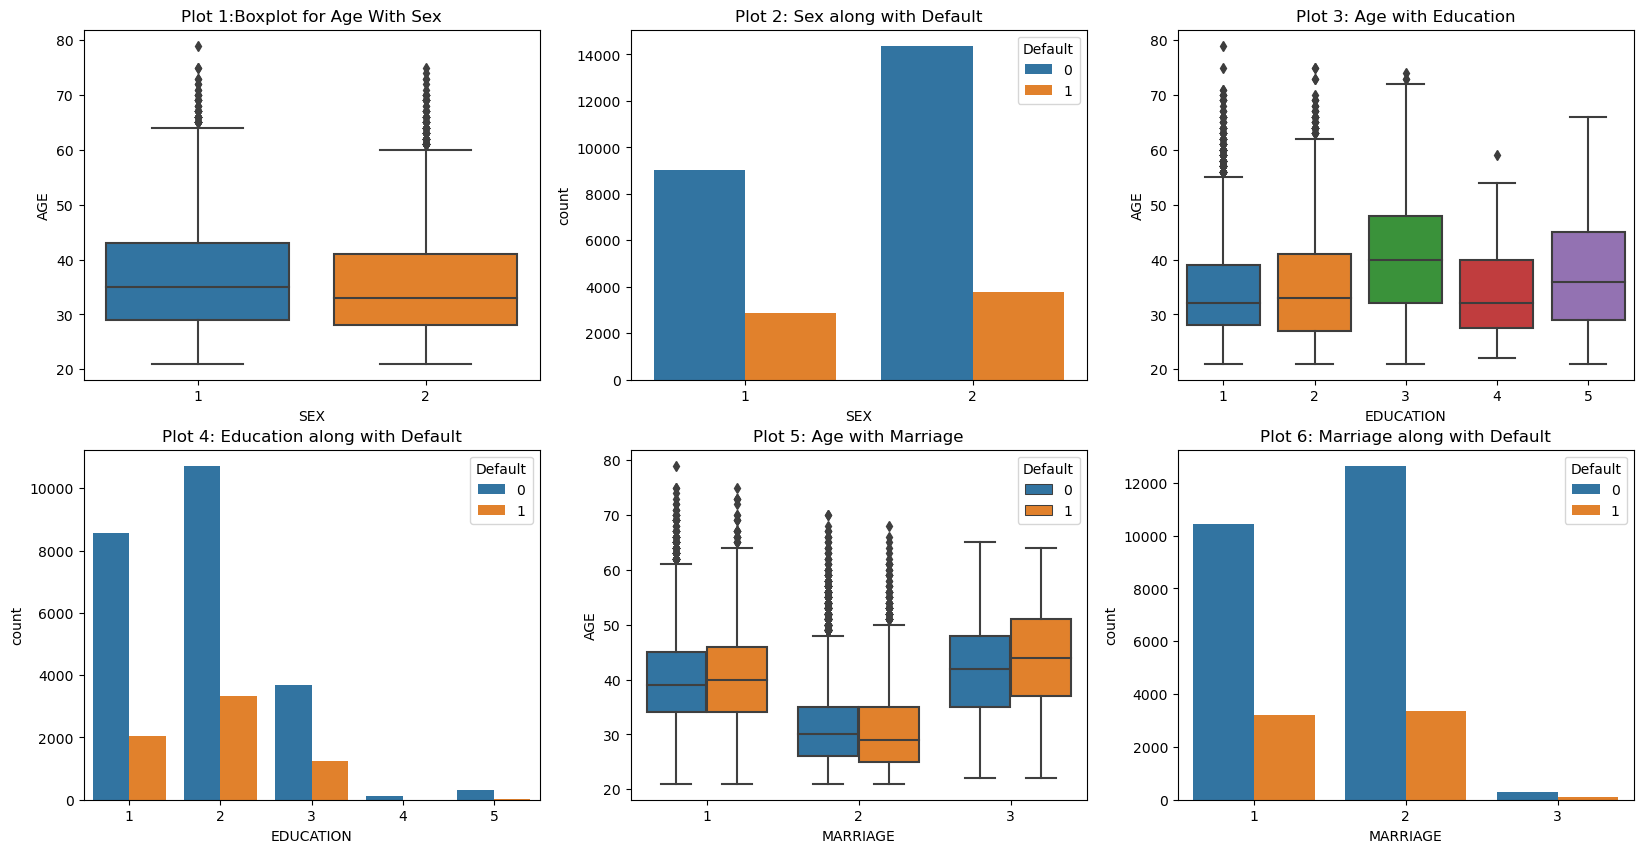

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Plot 1:Boxplot for Age With Sex')
sns.boxplot(df1.SEX,df1.AGE)
plt.subplot(2,3,2)
plt.title('Plot 2: Sex along with Default')
sns.countplot(x='SEX',hue='Default',data=df1)
plt.subplot(2,3,3)
plt.title('Plot 3: Age with Education')
sns.boxplot(df1.EDUCATION,df1.AGE)
plt.subplot(2,3,4)
plt.title('Plot 4: Education along with Default')
sns.countplot(x='EDUCATION',hue='Default',data=df1)
plt.subplot(2,3,5)
plt.title('Plot 5: Age with Marriage')
sns.boxplot(df1.MARRIAGE,df1.AGE,hue=df1.Default)
plt.subplot(2,3,6)
plt.title('Plot 6: Marriage along with Default')
sns.countplot(x='MARRIAGE',hue='Default',data=df1)

> INSIGHTS:
>  Median age for Men is higher than Female. 79yrs old customer is a male  
>  Males tend to be more defaulters than females   
>  Median Age for High School is highest
> There is not much difference in default for married and single customers

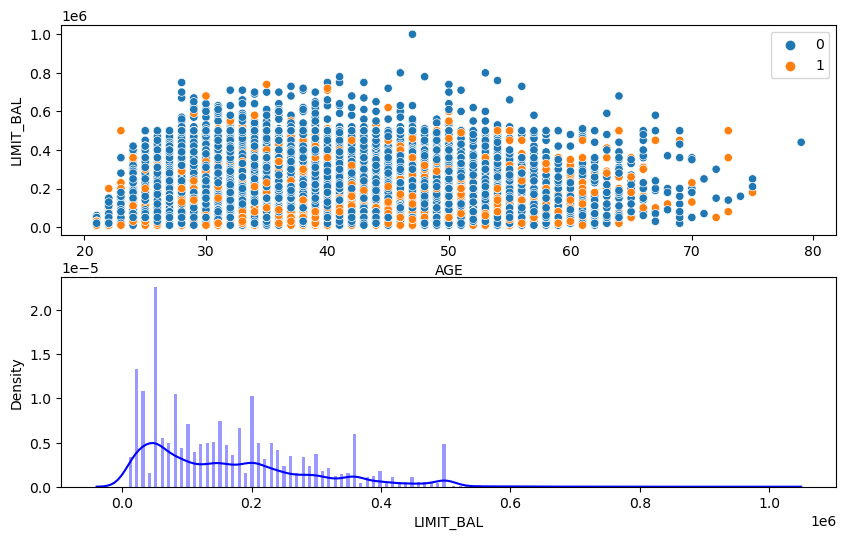

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.scatterplot(df1['AGE'],df1['LIMIT_BAL'],hue=df1.Default)
plt.legend()
plt.subplot(2,1,2)
sns.distplot(df1['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

> If credit limit and age is higher chance of someone defaulting is probably less.   
> Largest group of amount of credit limit is apparently for amount of 50K

### TRAIN TEST SPLIT

In [25]:
df2 = df1.copy()
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,...,BILL_AMT_jun,BILL_AMT_may,BILL_AMT_apr,PAY_AMT_sept,PAY_AMT_aug,PAY_AMT_jul,PAY_AMT_jun,PAY_AMT_may,PAY_AMT_apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
x=df2.drop('Default',axis=1)
y=df2['Default']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (24000, 23)
x_test (6000, 23)
y_train (24000,)
y_test (6000,)


## APPLYING FOR MODELS WITHOUT SCALING :

### 1. Decision Tree Classifier:

In [30]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)
ypred_dtc=dtc.predict(x_test)


In [31]:
accuracy_dtc=np.round(accuracy_score(y_test,ypred_dtc)*100,2)
f1_dtc = f1_score(y_test,ypred_dtc)
precision_dtc = precision_score(y_test,ypred_dtc)
recall_dtc = recall_score(y_test,ypred_dtc)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_dtc))
print('Accuracy :',accuracy_dtc,'\nF1-score :',f1_dtc,'\nPrecision :',precision_dtc,'\nRecall :',recall_dtc)

Confusion matrix :
 [[3839  864]
 [ 733  564]]
Accuracy : 73.38 
F1-score : 0.41394495412844035 
Precision : 0.3949579831932773 
Recall : 0.4348496530454896


#### 2. Random Forest Classifier

In [32]:
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train,y_train)
ypred_rfc=rfc.predict(x_test)


In [33]:
accuracy_rfc=np.round(accuracy_score(y_test,ypred_rfc)*100,2)
f1_rfc = f1_score(y_test,ypred_rfc)
precision_rfc = precision_score(y_test,ypred_rfc)
recall_rfc = recall_score(y_test,ypred_rfc)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_rfc))
print('Accuracy :',accuracy_rfc,'\nF1-score :',f1_rfc,'\nPrecision :',precision_rfc,'\nRecall :',recall_rfc)

Confusion matrix :
 [[4439  264]
 [ 815  482]]
Accuracy : 82.02 
F1-score : 0.47185511502692123 
Precision : 0.646112600536193 
Recall : 0.37162683114880496


#### 3. AdaBoost Classifier

In [34]:
adb=AdaBoostClassifier(n_estimators=100,random_state=0)
adb.fit(x_train,y_train)
ypred_adb=adb.predict(x_test)


In [35]:
accuracy_adb=np.round(accuracy_score(y_test,ypred_adb)*100,2)
f1_adb = f1_score(y_test,ypred_adb)
precision_adb = precision_score(y_test,ypred_adb)
recall_adb = recall_score(y_test,ypred_adb)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_adb))
print('Accuracy :',accuracy_adb,'\nF1-score :',f1_adb,'\nPrecision :',precision_adb,'\nRecall :',recall_adb)

Confusion matrix :
 [[4515  188]
 [ 861  436]]
Accuracy : 82.52 
F1-score : 0.45393024466423737 
Precision : 0.6987179487179487 
Recall : 0.3361603700848111


#### 4.Gaussian Naive Baiiyes

In [36]:
nb=GaussianNB()
nb.fit(x_train,y_train)
ypred_nb=nb.predict(x_test)

In [37]:
accuracy_nb=np.round(accuracy_score(y_test,ypred_nb)*100,2)
f1_nb = f1_score(y_test,ypred_nb)
precision_nb = precision_score(y_test,ypred_nb)
recall_nb = recall_score(y_test,ypred_nb)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_nb))
print('Accuracy :',accuracy_nb,'\nF1-score :',f1_nb,'\nPrecision :',precision_nb,'\nRecall :',recall_nb)

Confusion matrix :
 [[1021 3682]
 [ 130 1167]]
Accuracy : 36.47 
F1-score : 0.37975919297103805 
Precision : 0.24066817900598061 
Recall : 0.899768696993061


### Applying for model with scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### 4. Logistic Regression

In [40]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train_scaled,y_train)
ypred_lr=lr.predict(x_test_scaled)


In [41]:
accuracy_lr=np.round(accuracy_score(y_test,ypred_lr)*100,2)
f1_lr = f1_score(y_test,ypred_lr)
precision_lr = precision_score(y_test,ypred_lr)
recall_lr = recall_score(y_test,ypred_lr)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_lr))
print('Accuracy :',accuracy_lr,'\nF1-score :',f1_lr,'\nPrecision :',precision_lr,'\nRecall :',recall_lr)

Confusion matrix :
 [[4606   97]
 [ 990  307]]
Accuracy : 81.88 
F1-score : 0.3609641387419165 
Precision : 0.7599009900990099 
Recall : 0.23670007710100233


#### 5. SVC

In [42]:
svc=SVC(kernel='linear')
svc.fit(x_train_scaled,y_train)
ypred_svc=svc.predict(x_test_scaled)


In [43]:
accuracy_svc=np.round(accuracy_score(y_test,ypred_svc)*100,2)
f1_svc = f1_score(y_test,ypred_svc)
precision_svc = precision_score(y_test,ypred_svc)
recall_svc = recall_score(y_test,ypred_svc)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_svc))
print('Accuracy :',accuracy_svc,'\nF1-score :',f1_svc,'\nPrecision :',precision_svc,'\nRecall :',recall_svc)

Confusion matrix :
 [[4594  109]
 [ 986  311]]
Accuracy : 81.75 
F1-score : 0.3622597553873035 
Precision : 0.7404761904761905 
Recall : 0.23978411719352352


In [44]:
data = {'Accuracy':[accuracy_dtc,accuracy_rfc,accuracy_adb,accuracy_nb,accuracy_lr,accuracy_svc],
        'F1-score':[f1_dtc,f1_rfc,f1_adb,f1_nb,f1_lr,f1_svc],
        'precision':[precision_dtc,precision_rfc,precision_adb,precision_nb,precision_lr,precision_svc],
        'recall':[recall_dtc,recall_rfc,recall_adb,recall_nb,recall_lr,recall_svc]
       }
rows=['Decision Tree Classifier','Random Forest Classifier','AdaBoost Classiifer','Gaussian Naiive Bayes','Logistic Regression','Support Vector Classifier']

In [45]:
pd.DataFrame(data,index=rows)

,Accuracy,F1-score,precision,recall
Decision Tree Classifier,73.38,0.413945,0.394958,0.434850
Random Forest Classifier,82.02,0.471855,0.646113,0.371627
AdaBoost Classiifer,82.52,0.453930,0.698718,0.336160
Gaussian Naiive Bayes,36.47,0.379759,0.240668,0.899769
Logistic Regression,81.88,0.360964,0.759901,0.236700
Support Vector Classifier,81.75,0.362260,0.740476,0.239784


> since the dataset is an imbalanced data, accuracy is not a good metric here . F1 score being better metric in such cases shows, Random forest Classifier model is better

---

## Random Forest with One Hot Encoding

In [46]:
column_dict={'EDUCATION':'EDU','MARRIAGE':'MAR'}

def onehot_encoder(df,column_dict):
    df=df.copy()
    for column,prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [47]:
df3=onehot_encoder(df1,column_dict)
df3.head()

,LIMIT_BAL,SEX,AGE,PAY_sept,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_apr,BILL_AMT_sept,...,PAY_AMT_apr,Default,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,MAR_1,MAR_2,MAR_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,1,0,0,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,2000,1,0,1,0,0,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,5000,0,0,1,0,0,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,1000,0,0,1,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,0,0,1,0,0,0,1,0,0


In [48]:
x_ohe=df3.drop('Default',axis=1)
y_ohe=df3['Default']

In [49]:
x_ohe_train,x_ohe_test,y_ohe_train,y_ohe_test=train_test_split(x_ohe,y_ohe,test_size=0.2,random_state=0)

In [50]:
print('x_train',x_ohe_train.shape)
print('x_test',x_ohe_test.shape)
print('y_train',y_ohe_train.shape)
print('y_test',y_ohe_test.shape)

x_train (24000, 29)
x_test (6000, 29)
y_train (24000,)
y_test (6000,)


In [51]:
rfc_ohe=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_ohe.fit(x_ohe_train,y_ohe_train)
ypred_rfc_ohe=rfc_ohe.predict(x_ohe_test)


In [52]:
accuracy_rfc_ohe=np.round(accuracy_score(y_ohe_test,ypred_rfc_ohe)*100,2)
f1_rfc_ohe = f1_score(y_ohe_test,ypred_rfc_ohe)
precision_rfc_ohe = precision_score(y_ohe_test,ypred_rfc_ohe)
recall_rfc_ohe = recall_score(y_ohe_test,ypred_rfc_ohe)
print("Confusion matrix :\n",confusion_matrix(y_ohe_test,ypred_rfc_ohe))
print('Accuracy :',accuracy_rfc_ohe,'\nF1-score :',f1_rfc_ohe,'\nPrecision :',precision_rfc_ohe,'\nRecall :',recall_rfc_ohe)

Confusion matrix :
 [[4443  260]
 [ 813  484]]
Accuracy : 82.12 
F1-score : 0.4742773150416462 
Precision : 0.6505376344086021 
Recall : 0.37316885119506554


>> There not much difference in performance of Random Forest Classifier with One Hot Encoding

## OverSampling with SMOTE

In [54]:
smote=SMOTE(random_state=0)

In [55]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (24000, 23)
y_train (24000,)


In [56]:
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [57]:
print("Shape of oversampled data : x_train :",x_train_res.shape,"y_train :",y_train_res.shape)

Shape of oversampled data : x_train : (37322, 23) y_train : (37322,)


In [58]:
print("Before oversampling: default=1 ",sum(y_train==1))
print("Before oversampling: default=0 ",sum(y_train==0))
print("---------------------")
print("After oversampling : default=1 ",sum(y_train_res==1))
print("After oversampling : default=0 ",sum(y_train_res==0))

Before oversampling: default=1  5339
Before oversampling: default=0  18661
---------------------
After oversampling : default=1  18661
After oversampling : default=0  18661


In [59]:
rfc_smote=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_smote.fit(x_train_res,y_train_res)
ypred_rfc_smote=rfc_smote.predict(x_test)


In [60]:
accuracy_rfc_smote=np.round(accuracy_score(y_test,ypred_rfc_smote)*100,2)
f1_rfc_smote = f1_score(y_test,ypred_rfc_smote)
precision_rfc_smote = precision_score(y_test,ypred_rfc_smote)
recall_rfc_smote = recall_score(y_test,ypred_rfc_smote)
print("Confusion matrix :\n",confusion_matrix(y_test,ypred_rfc_smote))
print('Accuracy :',accuracy_rfc_smote,'\nF1-score :',f1_rfc_smote,'\nPrecision :',precision_rfc_smote,'\nRecall :',recall_rfc_smote)

Confusion matrix :
 [[4102  601]
 [ 685  612]]
Accuracy : 78.57 
F1-score : 0.48764940239043825 
Precision : 0.5045342126957956 
Recall : 0.471858134155744


>> Eventhough imbalance is mild (22%), checking if doing oversampling with SMOTE will have any impact on performance for our Random Forest Model.  
>> Doing oversampling didnt improve performance much fpr Random Forest Classifier.

---

## Final Model

> - From the initial model implementation Random Forest Classifier performed well based on F1 score. (since we are dealing with imbalanced dataset and accuracy metric can be misleading.)

> - Trying to improve this base model with doing encoding(for education and marriage as they are nominal) with One-Hot-Encoding  and oversampling with SMOTE techniques yielded very little improvement in model performance    

> - So the base model(Random Forest Classifier without encoding and Smote) itself is our final model


#### Finding Features of importance for credit card default

In [61]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sept',
       'PAY_aug', 'PAY_jul', 'PAY_jun', 'PAY_may', 'PAY_apr', 'BILL_AMT_sept',
       'BILL_AMT_aug', 'BILL_AMT_jul', 'BILL_AMT_jun', 'BILL_AMT_may',
       'BILL_AMT_apr', 'PAY_AMT_sept', 'PAY_AMT_aug', 'PAY_AMT_jul',
       'PAY_AMT_jun', 'PAY_AMT_may', 'PAY_AMT_apr'],
      dtype='object')

In [62]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sept',
       'PAY_aug', 'PAY_jul', 'PAY_jun', 'PAY_may', 'PAY_apr', 'BILL_AMT_sept',
       'BILL_AMT_aug', 'BILL_AMT_jul', 'BILL_AMT_jun', 'BILL_AMT_may',
       'BILL_AMT_apr', 'PAY_AMT_sept', 'PAY_AMT_aug', 'PAY_AMT_jul',
       'PAY_AMT_jun', 'PAY_AMT_may', 'PAY_AMT_apr']

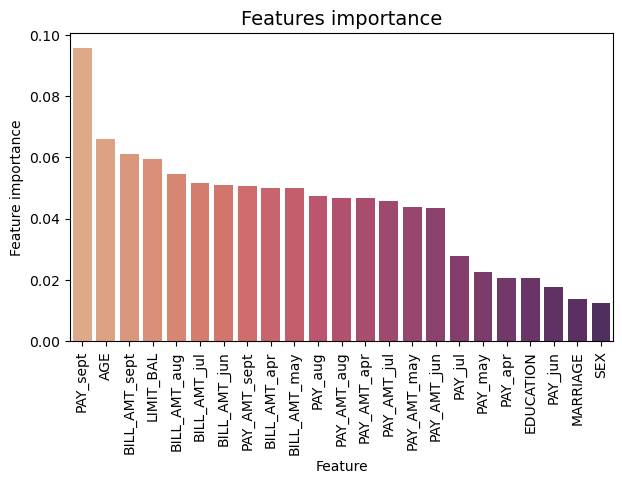

In [63]:
feature_imp = pd.DataFrame({'Feature': features, 'Feature importance': rfc.feature_importances_})
feature_imp = feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=feature_imp,palette='flare')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

> The most important features are:
- Pay_sept(Repayment status for 6th month), 
- AGE, 
- BILL_AMTsept(Bill statement for 6th month), 
- LIMIT_BAL(Amount credited as limiting balance), 
- BILL_AMTaug,
- BILL_AMTjul.

## Hyperparameter tuning with CrossValidation

In [66]:
kfold_validation=KFold(10)   
results1=cross_val_score(rfc,x_train,y_train,cv=kfold_validation,scoring='f1')
results1
print("F1-score after k fold for RFC :",np.mean(results1))

F1-score after k fold for RFC : 0.46895672054879733


> There is not much variation in performance